## import module__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter("ignore")

## dataframe__

In [2]:
cp_df = pd.read_csv('CarPrice.csv')
cp_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## data preparation__

In [3]:
cp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
obj_df = cp_df.select_dtypes(include = ['object']).copy()
obj_df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [5]:
obj_df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [6]:
car = obj_df.CarName.str.split(expand = True) 
Brand = car[0] 
obj_df['CarBrand'] = Brand 
obj_df.drop(columns = ['CarName'],inplace = True) 
obj_df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarBrand
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [7]:
print(obj_df['doornumber'].value_counts()) 
print('\n')
print(obj_df['cylindernumber'].value_counts()) 

four    115
two      90
Name: doornumber, dtype: int64


four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


In [8]:
encodedoorandcyl = {"doornumber":     {"four": 4, "two": 2},
                "cylindernumber": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "three": 3, "twelve":12 }}
obj_df = obj_df.replace(encodedoorandcyl) 
obj_df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarBrand
0,gas,std,2,convertible,rwd,front,dohc,4,mpfi,alfa-romero
1,gas,std,2,convertible,rwd,front,dohc,4,mpfi,alfa-romero
2,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi,alfa-romero
3,gas,std,4,sedan,fwd,front,ohc,4,mpfi,audi
4,gas,std,4,sedan,4wd,front,ohc,5,mpfi,audi


In [9]:
one_hot = pd.get_dummies(data = obj_df, 
                         columns=['carbody','drivewheel','fueltype',
                                  'aspiration','enginelocation'
                                  ,'fuelsystem','CarBrand'])
obj_df = one_hot 
obj_df.head()

,doornumber,enginetype,cylindernumber,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,enginelocation_front,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarBrand_Nissan,CarBrand_alfa-romero,CarBrand_audi,CarBrand_bmw,CarBrand_buick,CarBrand_chevrolet,CarBrand_dodge,CarBrand_honda,CarBrand_isuzu,CarBrand_jaguar,CarBrand_maxda,CarBrand_mazda,CarBrand_mercury,CarBrand_mitsubishi,CarBrand_nissan,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porcshce,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_toyouta,CarBrand_vokswagen,CarBrand_volkswagen,CarBrand_volvo,CarBrand_vw
0,2,dohc,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,dohc,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,ohcv,6,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,ohc,4,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,ohc,5,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
obj_df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [11]:
obj_df["enginetype"] = np.where(obj_df["enginetype"].str.contains("ohc"), 1, 0) # setiap string pada data kolom engine type yang mengandung ohc menjadi 1, yang tidak menjadi 0
obj_df.head()

,doornumber,enginetype,cylindernumber,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,enginelocation_front,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarBrand_Nissan,CarBrand_alfa-romero,CarBrand_audi,CarBrand_bmw,CarBrand_buick,CarBrand_chevrolet,CarBrand_dodge,CarBrand_honda,CarBrand_isuzu,CarBrand_jaguar,CarBrand_maxda,CarBrand_mazda,CarBrand_mercury,CarBrand_mitsubishi,CarBrand_nissan,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porcshce,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_toyouta,CarBrand_vokswagen,CarBrand_volkswagen,CarBrand_volvo,CarBrand_vw
0,2,1,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,6,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,4,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,1,5,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
obj_df.dtypes

doornumber              int64
enginetype              int32
cylindernumber          int64
carbody_convertible     uint8
carbody_hardtop         uint8
carbody_hatchback       uint8
carbody_sedan           uint8
carbody_wagon           uint8
drivewheel_4wd          uint8
drivewheel_fwd          uint8
drivewheel_rwd          uint8
fueltype_diesel         uint8
fueltype_gas            uint8
aspiration_std          uint8
aspiration_turbo        uint8
enginelocation_front    uint8
enginelocation_rear     uint8
fuelsystem_1bbl         uint8
fuelsystem_2bbl         uint8
fuelsystem_4bbl         uint8
fuelsystem_idi          uint8
fuelsystem_mfi          uint8
fuelsystem_mpfi         uint8
fuelsystem_spdi         uint8
fuelsystem_spfi         uint8
CarBrand_Nissan         uint8
CarBrand_alfa-romero    uint8
CarBrand_audi           uint8
CarBrand_bmw            uint8
CarBrand_buick          uint8
CarBrand_chevrolet      uint8
CarBrand_dodge          uint8
CarBrand_honda          uint8
CarBrand_i

In [13]:
nonobj_df = cp_df.select_dtypes(include=['int64', 'float64']).copy() # merupakan kolom awal yang sudah memiliki type int64 dan float64
df = obj_df.join(nonobj_df)

### outliers__

In [14]:
for i in df.columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    LowerBound = Q1 - 1.5 * IQR
    UpperBound = Q3 + 1.5 * IQR
    df = df[(df[i] >= LowerBound)|(df[i] <= UpperBound)]

## feature selection__

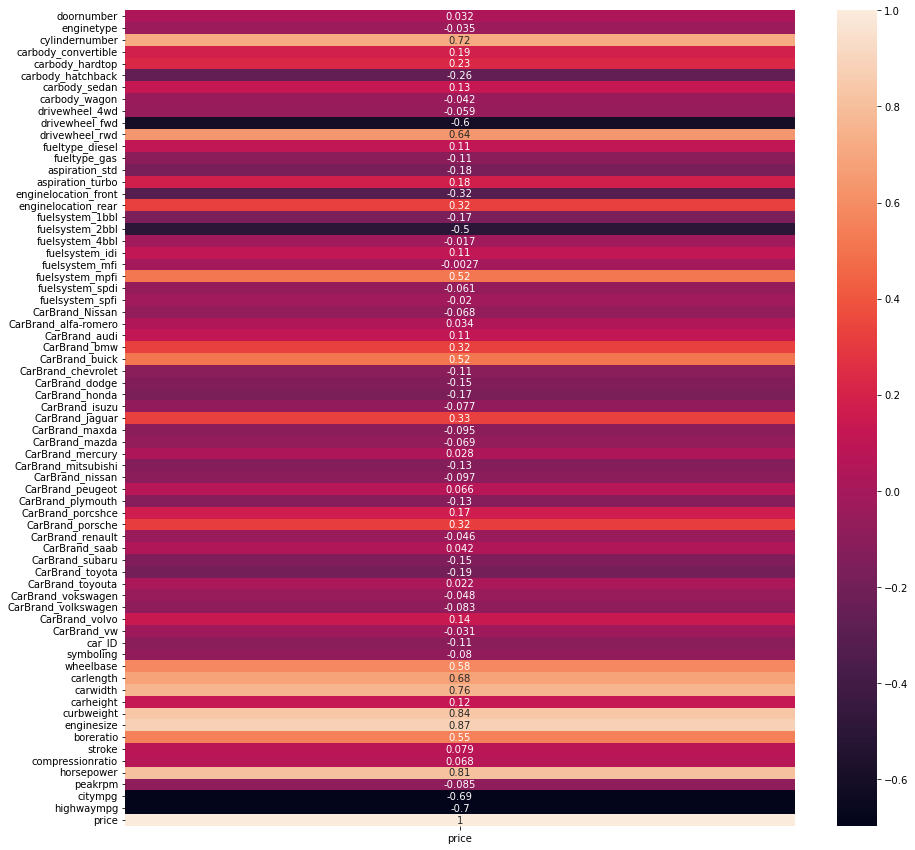

In [15]:
import seaborn as sns
plt.figure(figsize = (15,15)) 
corr = df.corr().iloc[:,-1:] 
sns.heatmap(corr, annot = True) 
plt.show() 

In [16]:
X = df.drop(columns=['price', 'car_ID'])
y = df['price']


from sklearn.model_selection import train_test_split # import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

import pandas as pd 
import statsmodels.api as sm 

def backward_regression(X, y,
                           initial_list = [], 
                           threshold_in = 0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
    included = list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() 
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        if not changed:
            break
    return included

backward_regression(X_train, y_train)

['doornumber',
 'enginetype',
 'carbody_convertible',
 'aspiration_std',
 'enginelocation_front',
 'fuelsystem_1bbl',
 'CarBrand_bmw',
 'CarBrand_buick',
 'CarBrand_chevrolet',
 'CarBrand_dodge',
 'CarBrand_jaguar',
 'CarBrand_mitsubishi',
 'CarBrand_nissan',
 'CarBrand_peugeot',
 'CarBrand_plymouth',
 'CarBrand_saab',
 'CarBrand_toyota',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'compressionratio',
 'peakrpm',
 'citympg']

## data splitting__

In [17]:
X = df[backward_regression(X_train, y_train)]
y = df['price']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## feature scaling__

In [18]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## model__1

In [19]:
from sklearn import linear_model 
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

### evaluation__

In [20]:
from sklearn.metrics import r2_score
yhat = regr.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat - y_test)))

print("Residual sum of squares (MSE): %.2f" % np.mean((yhat - y_test) ** 2)) 

print("R2-score: %.2f" % r2_score(y_test, yhat))

Mean absolute error: 2038.95
Residual sum of squares (MSE): 11148443.23
R2-score: 0.86


In [21]:
regr.predict(X_test)

array([ 6839.81276694, 18579.59050888, 13488.48449049,  5273.42764108,
       10768.07195548, 11209.99937239,  6600.31763338,  5379.37359582,
       16523.45224807,  8114.30574944, 21468.57885809, 23716.8328419 ,
       13323.14986447, 13222.25039302, 10186.33679635, 10568.70548055,
       11184.66059061, 18945.03586246,  8813.2897622 ,  7024.10899449,
       10462.74390374, 13266.28731155, 11645.03018537, 11385.35317094,
       17531.30292703,  6161.98498429,  7213.34918535, 15056.83417321,
        7237.61204655,  6521.17114797,  9283.54699307, 12800.45399216,
       14554.32049577, 10378.51785682,  6454.40910646, 29132.88963766,
       14755.88751238, 15988.05915225,  5182.78790766, 35646.77095752,
        9154.71887204])

## model__2

In [22]:
# X is a column with a correlation value with a column price of >= abs(0.5) Pearson's results
X = df[['cylindernumber', 'curbweight', 'carwidth', 'enginesize','horsepower','highwaympg', 
        'drivewheel_fwd', 'drivewheel_rwd', 'fuelsystem_mpfi', 'fuelsystem_2bbl', 'CarBrand_buick',
        'wheelbase', 'carlength', 'boreratio', 'citympg']] 
y = df['price']


from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn import linear_model 
regr2 = linear_model.LinearRegression() 
regr2.fit(X_train, y_train) 

LinearRegression()

### evaluasi__

In [23]:
from sklearn.metrics import r2_score
yhat2 = regr2.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat2 - y_test))) 

print("Residual sum of squares (MSE): %.2f" % np.mean((yhat2 - y_test) ** 2)) 

print("R2-score: %.2f" % r2_score(y_test, yhat2))

Mean absolute error: 2742.74
Residual sum of squares (MSE): 14697108.76
R2-score: 0.81


## model__3

In [24]:
# X is a column with a correlation value with a column price of >= abs(0.7) Pearson's results
X = df[['cylindernumber', 'curbweight', 'carwidth', 'enginesize','horsepower','highwaympg']] 
y = df['price']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

from sklearn import linear_model 
regr3 = linear_model.LinearRegression() 
regr3.fit(X_train, y_train)

LinearRegression()

### evaluation__

In [25]:
from sklearn.metrics import r2_score
yhat3 = regr3.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat3 - y_test))) 

print("Residual sum of squares (MSE): %.2f" % np.mean((yhat3 - y_test) ** 2))

print("R2-score: %.2f" % r2_score(y_test, yhat3))

Mean absolute error: 2905.28
Residual sum of squares (MSE): 16163076.45
R2-score: 0.79
